In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_excel('TSLA.xlsx')

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
dataset.drop('Adj Close',axis = 1, inplace = True)

In [5]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [6]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2416 non-null   datetime64[ns]
 1   Open    2416 non-null   float64       
 2   High    2416 non-null   float64       
 3   Low     2416 non-null   float64       
 4   Close   2416 non-null   float64       
 5   Volume  2416 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 113.4 KB


In [9]:
dataset.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [10]:
print(len(dataset))

2416


<AxesSubplot:>

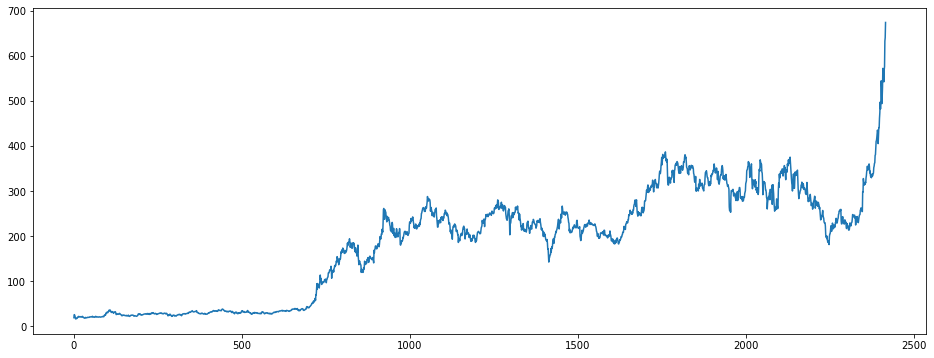

In [11]:
dataset['Open'].plot(figsize=(16,6))

In [12]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [14]:
X_train.shape

(1812, 4)

In [15]:
X_test.shape

(604, 4)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [17]:
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
print(regressor.coef_)

[-6.39634305e-01  9.11543017e-01  7.26604894e-01 -1.55475447e-08]


In [19]:
print(regressor.intercept_)

-0.06244869403116127


In [20]:
predicted=regressor.predict(X_test)

In [21]:
print(X_test)

            Open        High         Low    Volume
966   207.080002  214.020004  205.690002   5439900
557    27.900000   28.580000   27.799999   1145200
148    24.879999   24.879999   23.750000   1048400
1917  343.309998  348.619995  314.600006  10314600
1585  200.500000  200.899994  197.050003   2494600
...          ...         ...         ...       ...
1636  214.880005  222.250000  214.419998   5915700
1948  307.339996  307.589996  291.359985   8375200
2348  297.720001  330.000000  296.109985  30006100
1190  198.500000  200.500000  197.470001   2631600
359    32.490002   33.070000   31.629999    591100

[604 rows x 4 columns]


In [22]:
dframe=pd.DataFrame(y_test,predicted)

In [23]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [24]:
print(dfr)

          Actual   Predicted
966   207.729996  211.941303
557    28.280001   28.325464
148    24.010000   23.943206
1917  315.230011  326.556359
1585  200.240005  197.958571
...          ...         ...
1636  219.529999  220.790009
1948  304.179993  295.307237
2348  328.130005  325.003264
1190  199.630005  199.176271
359    31.750000   32.273881

[604 rows x 2 columns]


In [25]:
print('R-Square Error:', metrics.r2_score(y_test,predicted))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predicted)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))

R-Square Error: 0.9996847995136964
Mean Absolute Error: 1.3958905895674971
Root Mean Squared Error: 2.1026781250576776
Mean Squared Error: 4.42125529759607


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

#Fit x_train and y-train into the regression model
#fitting the decision tree regression model to the dataset without splitting the dataset
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
print('R-Square Error:', metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))



R-Square Error: 0.9985198814460736
Mean Absolute Error: 2.4987584602649013
Root Mean Squared Error: 4.556460487505346
Mean Squared Error: 20.761332174197456


In [27]:
from sklearn.ensemble import RandomForestRegressor
randomRegressor=RandomForestRegressor()
randomRegressor.fit(X_train,y_train)



y_pred = randomRegressor.predict(X_test)
print('R-Square Error:', metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

R-Square Error: 0.9991912815012104
Mean Absolute Error: 1.9719944386589456
Root Mean Squared Error: 3.3680462441862917
Mean Squared Error: 11.343735502977385


In [52]:
def my_dict(Stock,name,Error,score):
    my_matrix = {}
    my_matrix['Algorithm Name'] = name
    my_matrix['Stock Name'] = Stock
    
    my_matrix['Error Type'] = Error
    my_matrix['Score'] = score
    return my_matrix
    
import pandas as pd
# resultsdf = pd.DataFrame({'A' : []})
resultsdf = pd.DataFrame()
resultsdf=  resultsdf.append(my_dict('Symbol','RandomForestRegressor','R-Square Error:',metrics.r2_score(y_test,y_pred)),ignore_index=True)
resultsdf = resultsdf.append(my_dict('Symbol','RandomForestRegressor','Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred)),ignore_index=True)
resultsdf = resultsdf.append(my_dict('Symbol','RandomForestRegressor','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred))),ignore_index=True)
resultsdf = resultsdf.append(my_dict('Symbol','RandomForestRegressor','Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred)),ignore_index=True)
# resultsdf=resultsdf.transpose()
resultsdf

,Algorithm Name,Error Type,Score,Stock Name
0,RandomForestRegressor,R-Square Error:,0.999191,Symbol
1,RandomForestRegressor,Mean Absolute Error:,1.971994,Symbol
2,RandomForestRegressor,Root Mean Squared Error:,3.368046,Symbol
3,RandomForestRegressor,Mean Squared Error:,11.343736,Symbol
